This is the Jupyter notebook containing codes from the Data pre-processing folder of the GazeVisual-Lib repository.

700.0 18.444971030066437 13.845496917467445 5.543277457448414
700.0 18.444971030066437 13.845496917467445 5.543277457448414
700.0 18.444971030066437 13.845496917467445 5.543277457448414


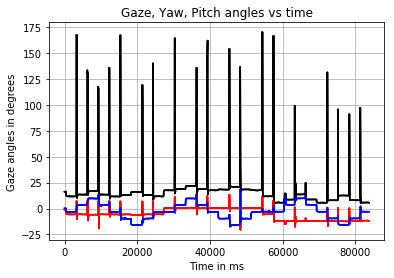

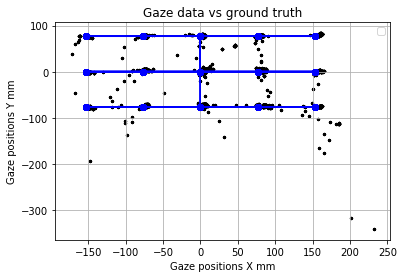

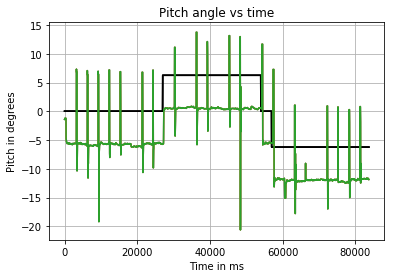

In [2]:

############ main_proc.py #####################

## This is the main program to 
## a)convert raw gaze data into gaze, yaw, pitch angles in degrees
## b) estimate gaze, yaw , pitch errors
## c) produce plots for raw gaze data and gaze angles 
## c) save outputs with all data related information in a CSV data file
##    that will be used in later programs for further processing
## d) Detailed derivations of the variables may be found in:
##    A. Kar ; P. Corcoran. Performance Evaluation Strategies for Eye Gaze Estimation Systems with Quantitative Metrics and Visualizations. 
##                          Sensors 2018, 18, 3151  
## Change all file paths to physical location of GazeVisual-Lib folders before running
## For queries, contact: anuradha.kar49@gmail.com
  
###############################################

import matplotlib.pyplot as plt
import csv
import numpy as np
import math
import os, sys

f_name=[]
res_x = 1680 # this is the horizontal or X resolution of the display 
res_y= 1050 # this is the verticall or Y resolution of the display 
mmpix = 0.28 # this is the pixel pitch calculated using Eqn 3 of the above reference
    
fpath = "C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Data pre-processing/Sample input data/"  #folder path where gaze data and ground truth are stored

### Load ground truth data####
with open('C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Data pre-processing/Sample input data/ground_truth_data.csv','r') as csvfile:
    gts = csv.reader(csvfile, delimiter=',')
    gt_x= []
    gt_y=[]
    for r1 in gts:
        gt_x.append(float(r1[0]))
        gt_y.append(float(r1[1]))

gt_x= gt_x[0:2510] 
gt_y= gt_y[0:2510] 

for file in os.listdir(fpath):
    parts = file.split('_')
    user_name = parts[0]
    user_dist= parts[1]                  
    us_dis = float(parts[1])*10
    gt_z=np.empty(len(gt_x))  
    gt_z.fill(us_dis)
    
    str1 = '_'.join(map(str,[parts[0],parts[1]]) )
    str2= '_'.join(map(str,[parts[3],parts[4]]) )
    #print file, str1, str2  
    f_name_c = os.path.join(fpath,str1+ "_c_"+ str2)
    f_name_r = os.path.join(fpath,str1+ "_r_"+ str2)
    f_name_l = os.path.join(fpath,str1+ "_l_"+ str2)
    
    with open(f_name_c,'r') as csvfile:   # open the gaze centered coordinates file and load data
        x=[]
        y=[]
        tim_st =[]
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            x.append(float(row[0]))
            y.append(float(row[1]))
            x= x[0:2510] 
            y= y[0:2510] 
            tim_st.append(float(row[3]))
            tim_st= tim_st[0:2510] 
            
    with open(f_name_r,'r') as csvfile:   # open the right eye gaze coordinates file and load data
        rx_pos=[]
        ry_pos= []
        zr=[]
        dist_r = csv.reader(csvfile, delimiter=',')
        for row in dist_r:
            zr.append(float(row[2]))
            rx_pos.append(float(row[0]))
            ry_pos.append(float(row[1]))
            zr= zr[0:2510] 
            rx_pos= rx_pos[0:2510] ##convert to fixed array length
            ry_pos= rx_pos[0:2510] ##convert to fixed array length
            
    with open(f_name_l,'r') as csvfile: # open the left eye gaze coordinates file and load data
        lx_pos=[]
        ly_pos= []
        zl=[]
        dist_l = csv.reader(csvfile, delimiter=',')
        for row in dist_l:
            zl.append(float(row[2]))
            lx_pos.append(float(row[0]))
            ly_pos.append(float(row[1]))
            zl= zl[0:2510] 
            lx_pos= lx_pos[0:2510]   ##convert to fixed array length
            ly_pos= ly_pos[0:2510]   ##convert to fixed array length
    
    avg_r = sum(zr) / len(zr)
    avg_l = sum(zl) / float(len(zl))  
    avg_z= (avg_r+avg_l)/2
    st= tim_st[0]
    #create relative time stamp
    tim_rel= [l - st for l in tim_st]
    
    #Convert ground truth data to mm (raw data  is in pixels)
    
    gtx_mm= [a * 0.228 for a in gt_x]
    gty_mm=  [b * 0.228 for b in gt_y]
    yaw_gt=[]
    yaw_gt = [math.degrees(math.atan(i/ us_dis)) for i in gtx_mm]
    pitch_gt = [math.degrees(math.atan(m/ us_dis)) for m in gty_mm]
    
    #Convert raw gaze position to mm (raw data is in pixels)
    xraw= x
    yraw= y
    x = [l * 0.228 for l in x]
    y = [j * 0.228 for j in y]
    mean_eye_x =(np.array(rx_pos)+np.array(lx_pos))/2
    diff_x = np.array(x)-np.array(mean_eye_x)
    
    ############# Estimate gaze yaw/pitch errors
    
    yaw_data = [math.degrees(math.atan(k/ avg_z)) for k in diff_x]
    diff_yaw = np.array(yaw_gt)-np.array(yaw_data)
    mean_eye_y =(np.array(ry_pos)+np.array(ly_pos))/2
    diff_y = np.array(y)-np.array(mean_eye_y)
    pitch_data = [math.degrees(math.atan(p/ avg_z)) for p in diff_y]
    diff_pitch = np.array(pitch_gt)-np.array(pitch_data)
    
    ############# Estmate gaze angles relative to eye tracker ############
    ##Eye to gaze point distance	
    
    dx_sq =[q**2 for q in diff_x]		
    dy_sq= [q1**2 for q1 in diff_y] 
    mean_z = (np.array(zr)+np.array(zl))/2  #culprit
    z_sq = [q2**2 for q2 in mean_z] 
    sum1 = np.array(dx_sq)+np.array(dy_sq)+np.array(z_sq)
    egp = [np.sqrt(q3) for q3 in sum1] 
    mon_dim= (res_y/2)* mmpix
    x_sq = [q3**2 for q3 in mean_eye_x]
    y_1 = [q4+mon_dim for q4 in mean_eye_y] 
    y_sq = [q5**2 for q5 in y_1]
    sum2= np.array(x_sq)+np.array(y_sq)+np.array(z_sq)
    eet = [np.sqrt(q6) for q6 in sum2] 
    
    ##Gaze point to eye tracker distance		
    
    gzx_sq= [q7**2 for q7 in x]
    y_2 = [q8+mon_dim for q8 in y] 
    gzy_sq= [q9**2 for q9 in y_2]
    sum3= np.array(gzx_sq)+np.array(gzy_sq)
    g_et =[abs(np.sqrt(q10)) for q10 in sum3]
    
    ##### Gaze angle relative to eye tracker				
    
    prod= [2*m10*n10 for m10,n10 in zip(egp,eet)] 
    b92_sq= [q12**2 for q12 in egp]
    b95_sq= [q13**2 for q13 in eet]
    b98_sq= [q14**2 for q14 in g_et]
    sum4= np.array(b92_sq)+np.array(b95_sq)-np.array(b98_sq)
    div = [ai/bi for ai,bi in zip(sum4,prod)]
    get_ang =[math.degrees(math.acos(q15)) for q15 in div]
    
    ######Estimate ground truth angles ##############################
    # Eye to gaze point distance
    gx_sq= [c1**2 for c1 in gtx_mm]
    gy_sq= [c2**2 for c2 in gty_mm]
    gz_sq = [c3**2 for c3 in gt_z]
    sum5 = np.array(gx_sq)+np.array(gy_sq)+np.array(gz_sq)
    gt_et = [abs(np.sqrt(c4)) for c4 in sum5]
    
    # Eye to eye tracker distance
    
    ge_et = np.empty(len(gt_x)) 
    c5 = ((res_y/2.0)* mmpix)**2
    c6 = (us_dis)**2
    sum6 = math.sqrt(c5+c6)
    ge_et.fill(sum6)
    
    ##Gaze point to eye tracker distance
    c7= ((res_y/2.0)* mmpix)
    sum7 = [(c8+c7)**2 for c8 in gty_mm]
    sum8 = np.array(gx_sq)+np.array(sum7)
    ggp_et = [abs(np.sqrt(c9)) for c9 in sum8]
    
    ##Gaze angle relative to eye tracker		
    sq1= [d1**2 for d1 in gt_et]
    sq2 = [d2**2 for d2 in ge_et]
    sq3= [d3**2 for d3 in ggp_et]
    sum9 = np.array(sq1)+np.array(sq2)- np.array(sq3)
    prod3= [2*m1*n1 for m1,n1 in zip(gt_et,ge_et)] 
    div2= [m2/n2 for m2,n2 in zip(sum9,prod3)] 
    gtt_ang =[math.degrees(math.acos(q16)) for q16 in div2]
    
    ########### Calculate gaze error 
    
    diff_gz=[abs(m3-n3) for m3,n3 in zip(get_ang,gtt_ang)]	
    
    print us_dis, np.mean(get_ang), np.mean(gtt_ang), np.mean(diff_gz)

####### saving data #####################
#to save:  gtx_mm,ymm, x,y, yaw/pitch_gt, yaw/pitch_data,get_ang, gtt_ang, diff gz, aoi_ind, aoi_x,aoi_y,mean_err, std_err
    f = open("user_data_proc.csv", "w")
    f.write("{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}\n".format("TIM REL","GTX", "GTY","XRAW", "YRAW","GT Xmm", "GT Ymm","Xmm", "Ymm","YAW GT", "YAW DATA","PITCH GT", "PITCH DATA","GAZE GT","GAZE ANG", "DIFF GZ"))
    for w1 in zip(tim_rel, gt_x, gt_y, xraw,yraw, gtx_mm,gty_mm,x,y,yaw_gt, yaw_data, pitch_gt, pitch_data, gtt_ang,get_ang, diff_gz):
        f.write("{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}\n".format(w1[0], w1[1],w1[2], w1[3],w1[4], w1[5],w1[6], w1[7],w1[8], w1[9],w1[10], w1[11],w1[12], w1[13],w1[14],w1[15]))
    f.close()
            
############save figure yaw, pitch, x,ymm with gtmm 3 per file
    f1 = plt.figure(1)
    plt.plot(tim_rel,get_ang,color='k')
    plt.plot(tim_rel,pitch_data,color='r')
    plt.plot(tim_rel,yaw_data,color='b')
    plt.xlabel('Time in ms')
    plt.ylabel('Gaze angles in degrees')
    plt.title("Gaze, Yaw, Pitch angles vs time")
    plt.grid(True)
    plt.close
    f1.show()
    
    f2 = plt.figure(2)
    plt.plot(gtx_mm,gty_mm, 'bo-')
    plt.scatter(x,y,s=5, color='k')#, label='Tobi 45 cm')
    plt.xlabel('Gaze positions X mm')
    plt.ylabel('Gaze positions Y mm')
    plt.title("Gaze data vs ground truth")
    plt.legend()
    plt.grid(True)
    f2.show()
    
    f3 = plt.figure(3)
    plt.plot(tim_rel,pitch_gt,color='k')
    plt.plot(tim_rel,pitch_data)
    plt.xlabel('Time in ms')
    plt.ylabel('Pitch in degrees')
    plt.title("Pitch angle vs time")
    plt.grid(True)
    plt.close
    f1.show()
    


This is the Jupyter notebook for the outlier_removal.py file of the GazeVisual-Lib repository. This program implements 3 different outlier removal strategies on gaze data. For implementation of the outlier removal methods, the CSV file named user_data_proc.csv is used.

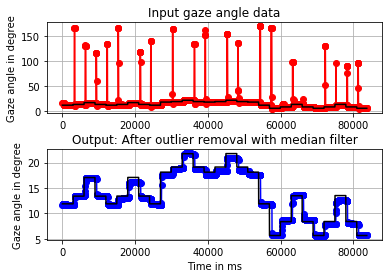

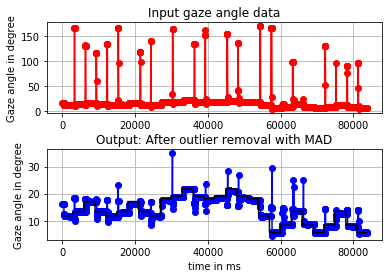

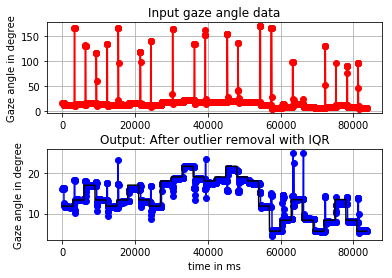

In [4]:
#############################################

from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt
import csv
import numpy as np
import math
import os, sys
import scipy.interpolate as sp
import scipy.interpolate
import matplotlib.mlab as mlab
import itertools
from scipy import stats
from scipy import signal


tim_rel=[]
gaze_ang=[]
gaze_gt=[]


###load gaze angle and ground truth data from from user_proc_desk.csv file#####

with open('C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Data pre-processing/','r') as csvfile:   
    datavals = csv.reader(csvfile, delimiter=',')
    datavals.next()
    for r1 in datavals:
        tim_rel.append(float(r1[0]))
        gaze_ang.append(float(r1[14]))   #Gaze angle data loaded from CSV file
        gaze_gt.append(float(r1[13]))    #Ground truth angle data loaded from CSV file

################################# 1. Apply median filtering ###################

y2= signal.medfilt(gaze_ang,41)
plt.scatter(tim_rel, y2, color= 'r')

f1 = plt.figure(1)
plt.subplot(2,1,1)
plt.plot(tim_rel,gaze_ang,'ro-')
plt.plot(tim_rel,gaze_gt,'k-')
plt.ylabel('Gaze angle in degree')
plt.title('Input gaze angle data')
plt.subplots_adjust(hspace = 0.4)

plt.grid()
plt.subplot(2,1,2)
plt.plot(tim_rel,y2,'bo-')
plt.plot(tim_rel,gaze_gt,'k-')
plt.title('Output: After outlier removal with median filter')
plt.xlabel('Time in ms')
plt.ylabel('Gaze angle in degree')
plt.grid()
plt.show()


####################### 2. Applying nedian absolute deviation method ##########
threshold = 3.5
ys= gaze_ang[0:2510]
median_y = np.median(ys)
median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]

for n, i in enumerate(modified_z_scores):
    if (np.abs(modified_z_scores[n]) > threshold):
        ys[n]= np.mean(ys)

f3 = plt.figure(3)
plt.subplot(2,1,1)
plt.plot(tim_rel,gaze_ang,'ro-')
plt.title('Input gaze angle data')
plt.ylabel('Gaze angle in degree')
plt.title('Input gaze angle data')
plt.subplots_adjust(hspace = 0.4)

plt.grid()
plt.subplot(2,1,2)
plt.plot(tim_rel,ys,'bo-')
plt.plot(tim_rel,gaze_gt,'k-')
plt.title('Output: After outlier removal with MAD')
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degree')
plt.grid()
plt.show()

####################### 3. Applying IQR method ################################
ys1= gaze_ang[0:2510]      
quartile_1, quartile_3 = np.percentile(ys, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)

outlier1=np.zeros(2517)
for n, i in enumerate(ys):
    if (ys1[n] > upper_bound) | (ys1[n] < lower_bound):
        outlier1[n]= ys1[n]
        ys1[n]= np.mean(ys1)
        
        
f4 = plt.figure(4)
plt.subplot(2,1,1)
plt.plot(tim_rel,gaze_ang,'ro-')
plt.title('Input gaze angle data')
plt.ylabel('Gaze angle in degree')
plt.title('Input gaze angle data')
plt.subplots_adjust(hspace = 0.4)
plt.grid()
plt.subplot(2,1,2)
plt.plot(tim_rel, ys1,'bo-')
plt.plot(tim_rel,gaze_gt,'k-')
#plt.plot(tim_rel, outlier1,'bo-')
plt.title('Output: After outlier removal with IQR')
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degree')
plt.grid()
plt.show()



This is the Jupyter notebook for the data_augmentation.py file of the GazeVisual-Lib repository. This program implements 7 different augmentation strategies on gaze data. For implementation of the augmentation methods, the CSV file named user_data_proc.csv is used.

C:\Users\14233242\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in power


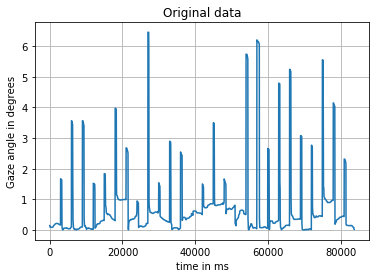

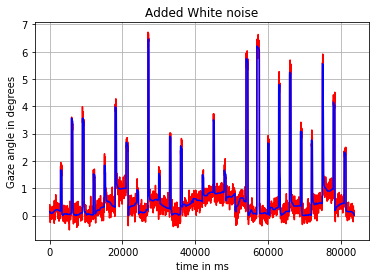

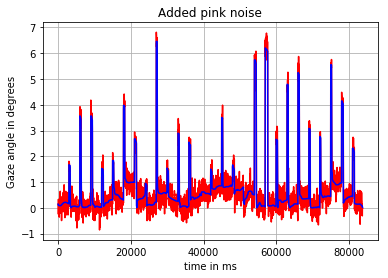

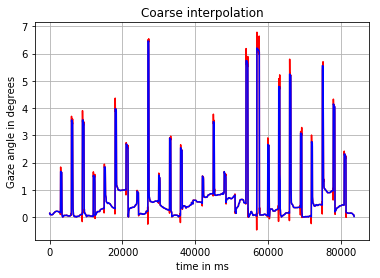

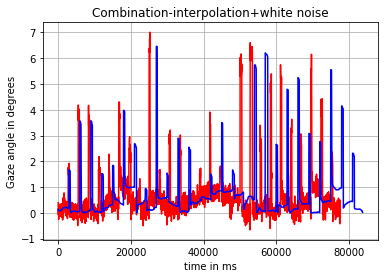

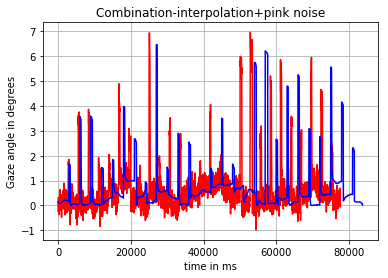

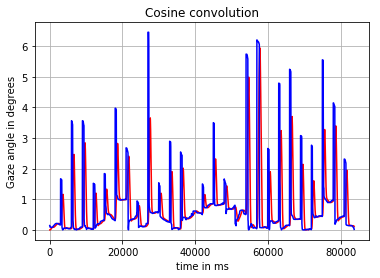

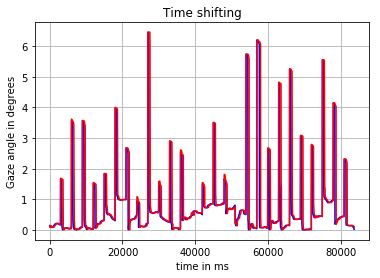

In [10]:
from pandas import Series
import matplotlib.pyplot as plt
import csv
import numpy as np
import math
import os, sys
from scipy.stats import gaussian_kde
import scipy.interpolate as sp
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy.interpolate
from scipy.stats import norm
import matplotlib.mlab as mlab
import itertools
from scipy import stats
from scipy import signal
from scipy.interpolate import interp1d
from scipy.ndimage.interpolation import shift

gtx=[]
gty=[]
tim_rel=[]
gaze_gt=[]
gaze_inp=[]
dff=[]
gaze_ang=[]

with open('C:/Users/Documents/Python Scripts/GazeVisual-Lib-master/Code repository/Data pre-processing/user_data_proc.csv','r') as csvfile:   
    datavals = csv.reader(csvfile, delimiter=',')
    datavals.next()
    for r1 in datavals:
        tim_rel.append(float(r1[0]))
               
        gaze_ang.append(float(r1[14]))   #Load gaze angle data
        gaze_inp.append(float(r1[14]))
        gaze_gt.append(float(r1[13]))  #Load gaze ground truth angle

        
#### Outlier removal and error calculation
gz_filt= signal.medfilt(gaze_ang,41) ## Do median filtering to remove outliers
for n, i in enumerate(gz_filt):   ### Add thresholding to further remove outliers
    if i > 50:
        gz_filt[n] = np.median(gz_filt)
gz_err= [abs(m3-n3) for m3,n3 in zip(gz_filt,gaze_gt)]	# Filtered gaze error data
gz_err=gz_err[0:2510] # Converting gz_err to fixed array lengths
tim_rel= tim_rel[0:2510]
######## 1. Add Gaussian noise #############

g_noise= np.random.normal(0, 0.2, len(gz_err))
g_noise= g_noise 
data_aug1= gz_err+g_noise

########### 2. Add pink noise ###############################

def one_over_f(f, knee, alpha):
    desc = np.ones_like(f)
    desc[f<KNEE] = np.abs((f[f<KNEE]/KNEE)**(-alpha))
    desc[0] = 1
    return desc

white_noise_sigma =  0.2 

SFREQ = 2 #Hz
KNEE = 5 / 1e3 #Hz
ALPHA = .7
N = len(gz_err)

wn=np.random.normal(0.,white_noise_sigma*np.sqrt(SFREQ),N)

#shaping in freq domain
s = np.fft.rfft(wn)
f = np.fft.fftfreq(N, d=1./SFREQ)[:len(s)]
f[-1]=np.abs(f[-1])
fft_sim = s * one_over_f(f, KNEE, ALPHA)
T_sim = np.fft.irfft(fft_sim)  #pink noise data

pn= np.append(T_sim, min(T_sim))
pn= pn[0:2510]  #Size of noise array should be same as gaze data
data_aug2= gz_err+pn

#################### 3. Coarse interpolation ###################################################

interp = interp1d(tim_rel,gz_err, kind='cubic',bounds_error=False)
xnew = np.arange(0, 90612,36)#
xnew= xnew[0:2510] 
data_aug3 = interp(xnew)

############################### 4. Add white and pink noise to interpolated data ###################################
data_aug4 = data_aug3+ g_noise

data_aug5 = data_aug3+ pn

############################### 6. Implement cosine convolution ############################################
win = signal.hann(30)
data_aug6 = signal.convolve(gz_err, win, mode="full")/sum(win) #imp: crop data to length 2517

#################### 7.Implement time shift to data points ################################################################

val= np.mean(gz_filt[0:10])
xs = np.array(gz_filt)
ys= shift(xs, 10, cval=val)
data_aug7= [abs(m3-n3) for m3,n3 in zip(ys,gaze_gt)]

############################# Plot orginal and augmented data ###################################################

f1 = plt.figure(1)
plt.plot(tim_rel,gz_err)
plt.title("Original data")
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degrees')
plt.grid(True)

f2 = plt.figure(2)
plt.plot(tim_rel,data_aug1,'r')
plt.plot(tim_rel,gz_err,'b')
plt.title("Added White noise")
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degrees')
plt.grid(True)

f3 = plt.figure(3)
plt.plot(tim_rel,data_aug2,'r')
plt.plot(tim_rel,gz_err,'b')
plt.title("Added pink noise")
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degrees')
plt.grid(True)

f4 = plt.figure(4)
plt.title("Coarse interpolation")
plt.plot(xnew, data_aug3, 'r')
plt.plot(tim_rel,gz_err,'b')
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degrees')
plt.grid(True)

f5 = plt.figure(5)
plt.title("Combination-interpolation+white noise")
plt.plot(tim_rel,data_aug4,'r')
plt.plot(tim_rel,gz_err,'b')
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degrees')
plt.grid(True)

f6 = plt.figure(6)
plt.title("Combination-interpolation+pink noise")
plt.plot(tim_rel,data_aug5,'r')
plt.plot(tim_rel,gz_err,'b')
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degrees')
plt.grid(True)

f7 = plt.figure(7)
plt.title("Cosine convolution")
plt.plot(tim_rel,data_aug6[0:2510],'r')
plt.plot(tim_rel,gz_err,'b')
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degrees')
plt.grid(True)

f8 = plt.figure(8)
plt.title("Time shifting")
plt.plot(tim_rel, gz_err, 'b')
plt.plot(tim_rel,data_aug7, 'r')
plt.xlabel('time in ms')
plt.ylabel('Gaze angle in degrees')
plt.grid(True)
